<a href="https://colab.research.google.com/github/gbickenbach/Demand_AdvancedTransit/blob/main/Correlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
stations = pd.read_csv("drive/MyDrive/FYREE/Part Three/stations.csv")
stations = stations.drop(columns="Unnamed: 0")

In [ ]:
stations = stations.sort_values(by = ['Block Group'])

In [ ]:
sum = pd.DataFrame()
sum["1"] = 0
sum["2"] = 0
sum["3"] = 0
sum["4"] = 0
sum.loc[0] = 0
sum

In [ ]:
stations

,Station,Total,Block Group
22,Peterson Terrace,848,0
18,Marbleworks Pharmacy,20,1
29,Woodbridge,480,1
25,Post Office,4,1
20,Otterside,409,1
36,Greg's Market,104,1
17,Marbleworks Creekside,15,1
34,Town Green,5,2
33,Teen Center at Mary Hogan,3,2
32,Rec Center/South Village,11,2


In [ ]:
for i, row in enumerate(stations.iloc[:, 2]):
  if (row == 1):
    sum.iloc[0, 0] = sum.iloc[0, 0] + stations.iloc[i, 1]
  elif (row == 2):
    sum.iloc[0, 1] = sum.iloc[0, 1] + stations.iloc[i, 1]
  elif (row == 3):
    sum.iloc[0, 2] = sum.iloc[0, 2] + stations.iloc[i, 1]
  elif (row == 4):
    sum.iloc[0, 3] = sum.iloc[0, 3] + stations.iloc[i, 1]


In [ ]:
sum.to_csv("drive/MyDrive/FYREE/Part Three/stations_groups.csv")

In [ ]:
home = pd.read_csv("drive/MyDrive/FYREE/Part Two/Block Grouping/home.csv")
work = pd.read_csv("drive/MyDrive/FYREE/Part Two/Block Grouping/work.csv")
home = home.drop(columns="Unnamed: 0")
work = work.drop(columns="Unnamed: 0")

In [ ]:
home

,Block Group Home,Home Count
0,1,39
1,2,15
2,3,36
3,4,124


In [ ]:
sum

,1,2,3,4
0,1032,839,6210,2807


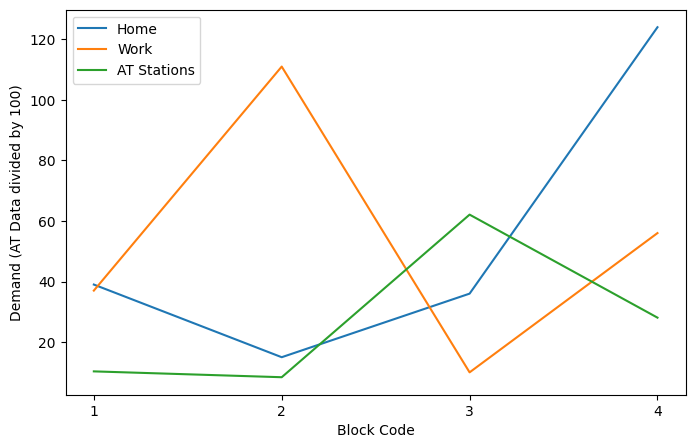

In [ ]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.xticks(np.arange(0, 5, 1))
plt.xlabel("Block Code")
plt.ylabel("Demand (AT Data divided by 100)")

xpoints = np.array(home.iloc[:, 0])
ypoints = np.array(home.iloc[:, 1])
plt.plot(xpoints, ypoints, label="Home")
plt.legend()

xpoints = np.array(home.iloc[:, 0])
ypoints = np.array(work.iloc[:, 1])
plt.plot(xpoints, ypoints, label="Work")
plt.legend()

xpoints = np.array(home.iloc[:, 0])
ypoints = np.array(sum.iloc[0] / 100)
plt.plot(xpoints, ypoints, label="AT Stations")
plt.legend()

plt.show()